<a href="https://colab.research.google.com/github/NaomiMunyiri/Compiler-Construction-Labs/blob/main/A_Labactivities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

122193 Naomi Munyiri; 121276 Julie Yego; 115384 Moses Kinoti; 123699 Chelsea Owiti; 122946 Lucy Nelima

LAB 1

**FLEX**

flex (fast lexical analyzer generator) is a tool for generating scanners: programs which recognize lexical patterns in text. It is used together with Berkeley Yacc parser generator or GNU Bison parser generator. flex reads the given input files (or its standard input if no file names are given) for a description of the scanner to generate.


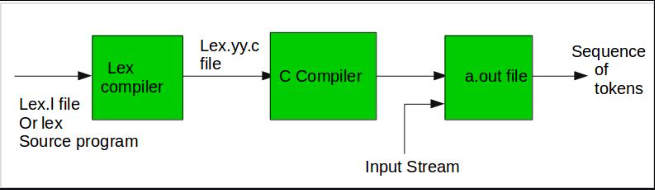

Below is a flex program to display hello world

In [ ]:
%{

#undef yywrap
#define yywrap() 1

%}

%%

[\n] {
	printf("Hello World\n");	
}

	
%%

main()
{
	yylex(); //calling the rules section
}

**BISON**

Bison is a general-purpose parser generator that converts an annotated context-free grammar into a deterministic LR or generalized LR (GLR) parser employing LALR (1) parser tables

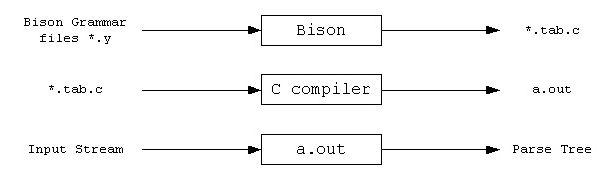


Below is a bison program of a simple calculator 




In [ ]:
%{
#include <stdio.h>
%}

/* declare tokens */
%token NUMBER
%token ADD SUB MUL DIV ABS
%token EOL

%%

calclist: /* nothing */                       matches at beginning of input
 | calclist exp EOL { printf("= %d\n", $2); } EOL is end of an expression
 ;

exp: factor       default $$ = $1 
 | exp ADD factor { $$ = $1 + $3; }
 | exp SUB factor { $$ = $1 - $3; }
 ;

factor: term       default $$ = $1 
 | factor MUL term { $$ = $1 * $3; }
 | factor DIV term { $$ = $1 / $3; }
 ;

term: NUMBER  default $$ = $1 
 | ABS term   { $$ = $2 >= 0? $2 : - $2; }
;
%%
main(int argc, char **argv)
{
  yyparse();
}

yyerror(char *s)
{
  fprintf(stderr, "error: %s\n", s);
}

**LEX**

Lex is a computer program that generates lexical analyzers and was written by Mike Lesk and Eric Schmidt. Lex reads an input stream specifying the lexical analyzer and outputs source code implementing the lex in the C programming language.

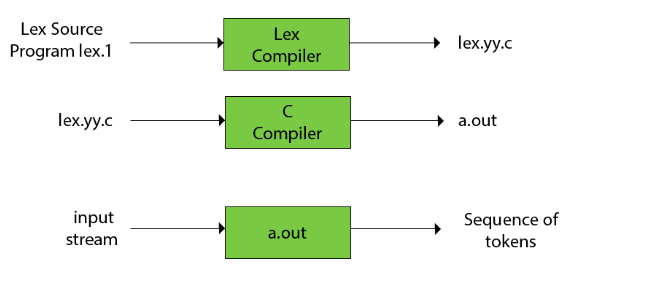

Lex code for password validation

In [ ]:
%{ 
    #include<stdio.h> 
    #include<string.h> 
    int a = 0, b=0, c=0, d=0, l=0; 
%} 
    
  
%% 
[a-z]    {a++;l++;}
[A-Z]    {b++;l++;}
[0-9]    {c++;l++;}
[$&+, :;=?@#|'<>.-^*()%!] {d++;l++;}
.  ;
%% 
    
int yywrap(void){} 
    
int main() 
{    
    // The function that starts the analysis 
    yylex(); 
      if(a>0 && b>0 && c>0 && d>0 && l>=8)
    printf("VALID\n");
    else
        printf("INVALID\n");
    return 0; 
} 

YACC

Yacc (for “yet another compiler compiler.”) is the standard parser generator for the Unix operating system. An open source program, yacc generates code for the parser in the C programming language. The acronym is usually rendered in lowercase but is occasionally seen as YACC or Yacc.

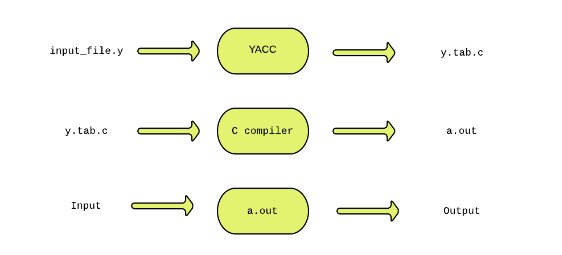


Below is YACC code to implement a calculator

In [ ]:
%{
   /* Definition section */
  #include<stdio.h>
  #include "y.tab.h"
  extern int yylval;
%}
  
/* Rule Section */
%%
[0-9]+ {
          yylval=atoi(yytext);
          return NUMBER;
  
       }
[\t] ;
  
[\n] return 0;
  
. return yytext[0];
  
%%
  
int yywrap()
{
 return 1;
}

LAB 2

a) Converting from NFA to DFA

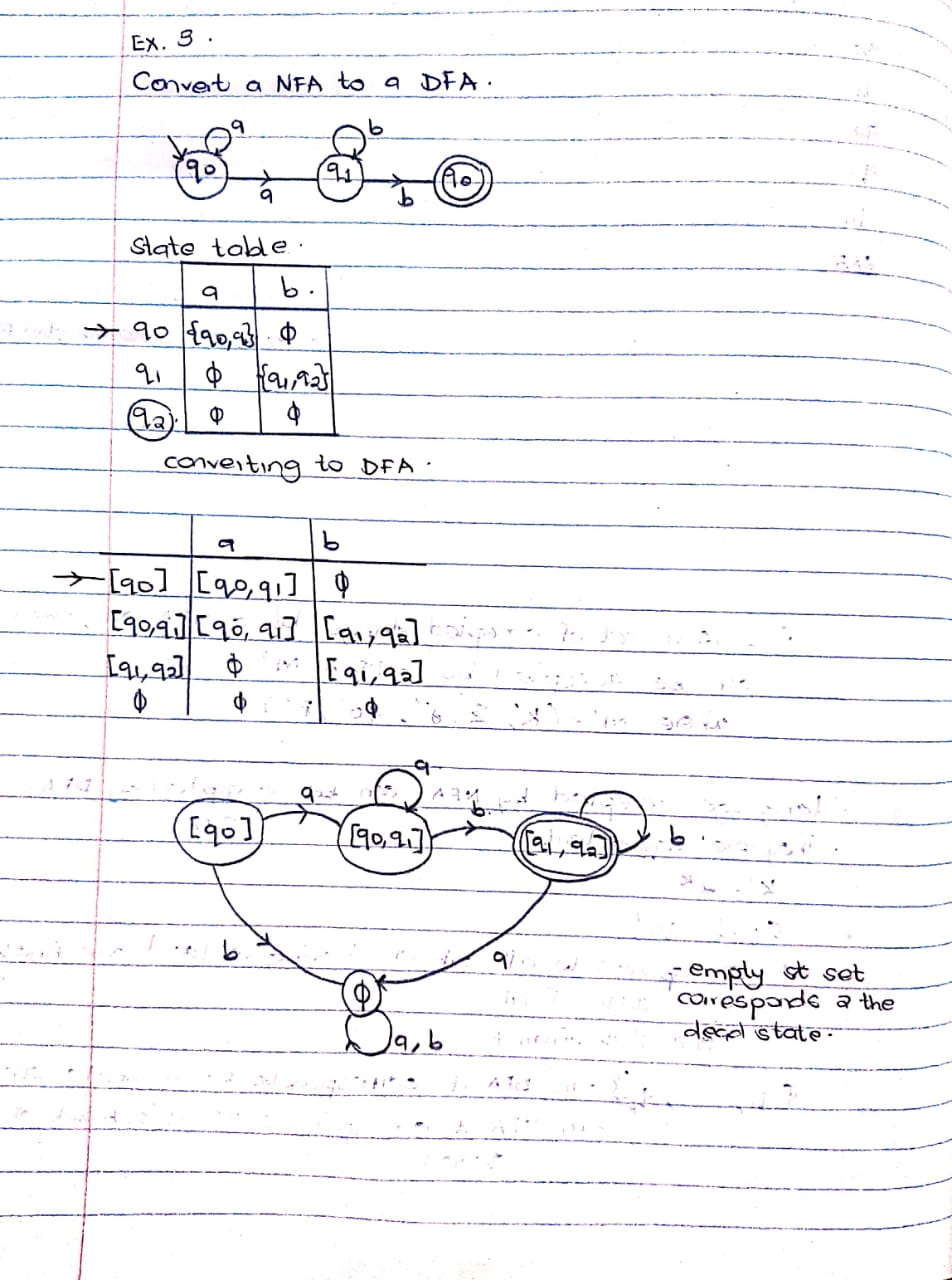

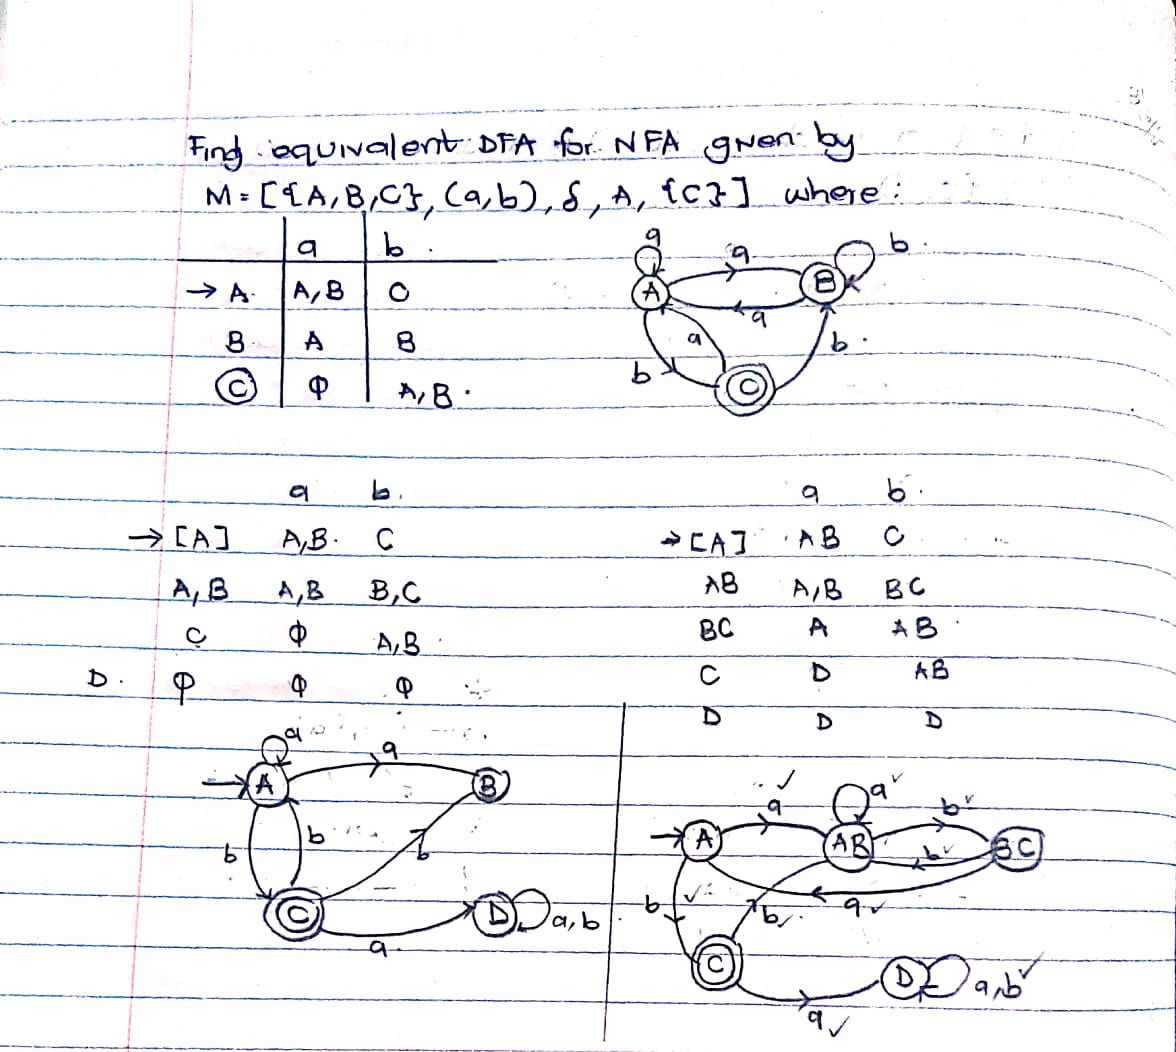

b) How to use Flex and Bison when building a simple lexical analyzer

flex is a tool for generating scanners. A scanner is a program which recognizes lexical patterns in text. The scanner's patterns are given using regular expressions, and the actions are provided using C code. Traditionally, specification files are distinguished by their .l extension. You use flex on a .l file, it generates lex.yy.c, a source file containing a slew of incomprehensible C code that implements an FA encoding all of your rules and including the action code as you indicated The file contains an extern function yylex(), which scans one token. You build that C file normally, link it with the Lex library, and you've created a scanner! By default, the scanner reads from stdin and outputs to stdout.



Example with flex:

In [ ]:

[ ]
%{
int no_of_lines = 0;
int no_of_chars = 0;
%}
  
%%
\n      ++no_of_lines;
.       ++no_of_chars;
end     return 0;
%%
  
int yywrap(){}
int main(int argc, char **argv)
{

#This is the main flex function  
yylex();
printf("number of lines = %d, number of chars = %d\n",
       no_of_lines, no_of_chars );
  
return 0;
}

A grammatical description (Bison Grammar Files) for a context-free grammar is converted into a C program using the general-purpose parser generator Bison. A bottom-up parser is the Bison parser. By using shifts and reductions, it seeks to condense all of the input into a single grouping whose symbol is the start-symbol of the grammar.

Example with bison:

In [ ]:
%{
#define YYSTYPE double
#include <math.h>
%}

/* BISON Declarations */
%token NUM
%left '-' '+'
%left '*' '/'
%left NEG     /* negation--unary minus */
%right '^'    /* exponentiation        */

/* Grammar follows */
%%
input:    /* empty string */
        | input line
;

line:     '\n'
        | exp '\n'  { printf ("\t%.10g\n", $1); }
;

exp:      NUM                { $$ = $1;         }
        | exp '+' exp        { $$ = $1 + $3;    }
        | exp '-' exp        { $$ = $1 - $3;    }

LAB 3

Lex file that find whether given number is within a certain range or not





In [ ]:
%{
	/*To find whether given number is within a certain range or not*/
#undef yywrap /*Returns the value 1 when the end of input occurs*/
#define yywrap() 1
	void display(int);
%}

%%

[1|2|3|4|5|6||7||8||9||10|] {
		int flag=1;
		display(flag);
		return;
		}

.+ {
	int flag=0;
	display(flag);
	return;
	}
	
%%

void display(int flag)
{
	if(flag==1)
		printf("The given number [%s] is valid",yytext);
	else
		printf("The given number [%s] is NOT a valid input",yytext);		
}

main()
{
	printf("Enter a value between 0 and 11\n");
	yylex(); 
}

OUTPUT

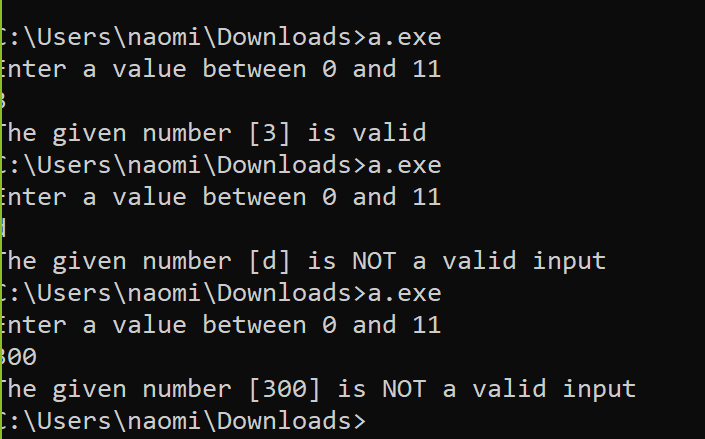

**LAB 4**

**Using an example or illustration, explain what is predictive parsing?**

A predictive parser is a recursive descent (Top-Down) parser that does not feature
backtracking or backup. It can effectively execute top-down parsing by managing the
stack of activation records.

In the figure below, a stack contains a combination of grammar symbols with the
symbol $ at the bottom of the stack. For this reason, when parsing begins the stack
contains the start symbol of a grammar followed by \$

The parsing table is a 2-D array of Non-Terminals (Rows) against terminals (Columns).
It is a data structure that gives structural representation of the input while checking for
correct syntax.

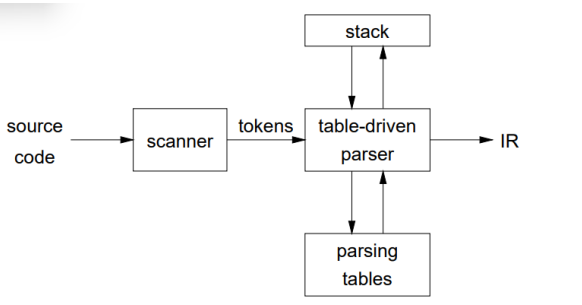

**As an extension to question 1,**

a. **What is LL (1) parsing?**

This is a top-down parsing technique that uses a one-token lookahead where:
• The first L indicates that the input is read from left to right.
• The second L says that it produces a left-to-right derivation
• The 1 says that it uses one lookahead token.

b. W**hy do we get the First () and Follow () i.e. what do these two functions Really Represent?**

The FIRST in reference to a non-terminal represents the first character of the
strings that can be derived beginning with the said non-terminal. However, he
FIRST of a terminal is the terminal itself.

The FOLLOW in reference to a non-terminal S represents the FIRST of the nonterminal that comes immediately after S in the derivation rules.
The functions above are used by parsing algorithms to determine which
production to use for parsing a string.

**Are there any unique attributes associated with Top-Down parsing?**

The rationale for top-down parsing following the left-most derivation of an input string
and not the right most derivation is that the input string is scanned by the parser from left
to right, one symbol at a time. The left-most derivation then generates the leaves from
the branches of the parse tree from left to right that then connects the input scan order.

As much as backtracking is a major Archilles’ heel for top-down parsing, it can still be
performed. However, if one production of a non-terminal fails in deriving the input
string, it forces the parser to return to the position where the production had been chosen
and a string is derived again using another production from the same non-terminal. This
process may require several repeated scans over the input string hence the term
‘backtracking’.

**LAB 5**

**1.	Review what syntax analysis is and in a few words, describe what this phase of compiler construction entails.**

The second stage of compiler design is called syntax analysis, and it involves verifying the formal grammar's rules and structure against the input string. It examines the syntactical structure and determines whether the input is in the proper programming language syntax or not.
Lexical analysis is followed by syntax analysis in the compiler design process. It is often referred to as the Syntax Tree or Parse Tree. The Parse Tree is created with the aid of the language's predefined grammar. The syntax analyzer also determines whether a particular program complies with the requirements of context-free grammar. The parser then generates the source program's parse tree if it is satisfied. If it is not satisfied, an error message is thrown.


**2.	Using Flex (lexical analyzer) and Bison (yacc), show how one can develop a simple syntax analyzer. [Consult the web, show and explain the simple codes that you find].**

Flex and Bison can be used to construct a simple syntax analyzer that counts the number of characters and the number of inputs as shown below:

•	Here in the first section, a declaration is made for two counters: one for the number of lines and one for the number of characters.

 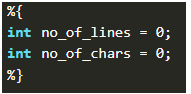

•	Rule specification comes in the second section where we include 3 rules: First rule is to count the number of lines, the second rule is to count the number of characters and the third rule is to specify when to stop the input.
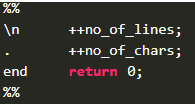
 

•	In the User section, we see yylex() used as the main flex function to run the rule section code and yywrap() that wraps above the rule section.

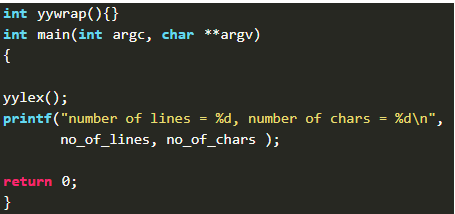
 
The output is shown below:

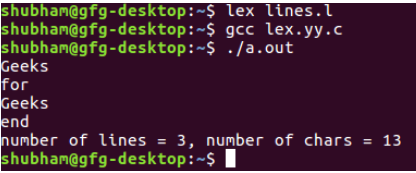
 


**LAB 6**

**Do a quick summary of the front end.
In this activity, use a string example e.g. x+2*y to show the work
of the various phases of the front end**

Summary:

The front end recognizes legal and illegal programs presented to it. If it runs into an error, 
it attempts to report the error in a useful way.

The front end is split into:
1.Scanner
2.Parser

1.Scanner:

  It takes a program as input and maps character stream into words that become the foundational
  unit of syntax.
  The resulting production is a pair of words and its part of speech. These pairs are known as tokens.
  
  Example:
  input x=y*5+z
  
              <id,x>

              <assign,=>

              <id,y>

              <op,*>

              <num,5>

              <op,+>
              
              <id,z>

2.Parser:

  Takes stream of tokens, recognizes the context-free syntax and reports the errors. The parser guides 
  semantic analysis for tasks such as type checking. It builds Intermediate Reprsentation(IR) for
  source programs.
  
  The parse representation is done using a parse tree that all rewrite during derivation. Dervation
  can be extracted by starting at the root of the tree and working towards the leaf node.

  Example:

  y*5+z

  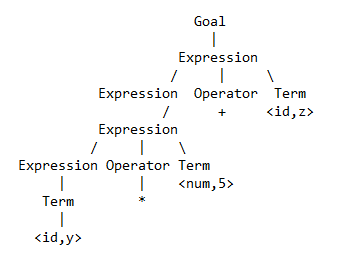

**LAB 7**

**1. Write the three address code (TAC) of the following:**

	a. Any if-statment of your choice
      
      if (a<b) then x = y*z else p = q-r
      
      Solution
      
      (0) if (a<b) goto (2)
      (1) goto (5)
      (2) T1 = y*z
      (3) x = T1
      (4) goto (8)
      (5) T1 = q-r
      (6) p = T1
      (7) goto (8)
      (8) end
 
	b. Any for-loop of your choice
      
      Solution
      
      for (i=1, i<=20, i++)  w = -x*y
      
      Solution
      
      (0) i=1
      (1) if i<=20 goto (7)
      (2) goto (10)
      (3) T1 = i+1
      (4) i = T1
      (5) goto (1)
      (6) T1 = x*y
      (7) T2 = uminus T1
      (8) w = T2
      (9) goto (10)
      (10) end

	c. Any while-loop of your choice
     
      Solution

      while (a<b) do x = y+z
      
      Solution
      
      (0) if (a<b) goto (2)
      (1) goto (5)
      (2) T1 = y+z
      (3) x = T1
      (4) goto (0)
      (5) end
      
2. Write the triple implmenetation of one of the TAC's in question 1 above.
   
   for (i=1, i<=20, i++)  w = -x*y

  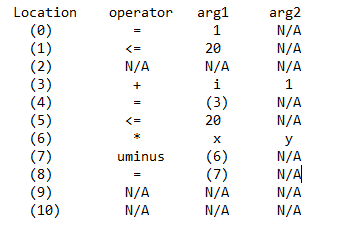
      

References

*   https://silcnitc.github.io/yacc.html
*   https://www.geeksforgeeks.org/lex-code-for-password-validation/#:~:text=Lex%20is%20a%20computer%20program,in%20the%20C%20programming%20language.


*   https://www.javatpoint.com/lex

*   http://alumni.cs.ucr.edu/~lgao/teaching/bison.html


*   https://www.oreilly.com/library/view/flex-bison/9780596805418/ch01.html



* http://web.mit.edu/gnu/doc/html/bison_5.html

*   https://www.oreilly.com/library/view/flex-bison/9780596805418/ch01.html
*   https://www.geeksforgeeks.org/flex-fast-lexical-analyzer-generator/






